In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/adhd-classification-data/ADHD_fif-20240509T211140Z-001/ADHD_fif/v196.fif
/kaggle/input/adhd-classification-data/ADHD_fif-20240509T211140Z-001/ADHD_fif/v32p.fif
/kaggle/input/adhd-classification-data/ADHD_fif-20240509T211140Z-001/ADHD_fif/v36p.fif
/kaggle/input/adhd-classification-data/ADHD_fif-20240509T211140Z-001/ADHD_fif/v227.fif
/kaggle/input/adhd-classification-data/ADHD_fif-20240509T211140Z-001/ADHD_fif/v20p.fif
/kaggle/input/adhd-classification-data/ADHD_fif-20240509T211140Z-001/ADHD_fif/v31p.fif
/kaggle/input/adhd-classification-data/ADHD_fif-20240509T211140Z-001/ADHD_fif/v181.fif
/kaggle/input/adhd-classification-data/ADHD_fif-20240509T211140Z-001/ADHD_fif/v209.fif
/kaggle/input/adhd-classification-data/ADHD_fif-20240509T211140Z-001/ADHD_fif/v254.fif
/kaggle/input/adhd-classification-data/ADHD_fif-20240509T211140Z-001/ADHD_fif/v8p.fif
/kaggle/input/adhd-classification-data/ADHD_fif-20240509T211140Z-001/ADHD_fif/v173.fif
/kaggle/input/adhd-classification-data/ADHD_

In [2]:
import mne
from glob import glob
import os
import mne
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


creating a list with the paths of the adhd files

In [3]:
ADHD_files_path=glob('/kaggle/input/adhd-classification-data/ADHD_fif-20240509T211140Z-001/ADHD_fif/*.fif')
ADHD_files_path_50 = ADHD_files_path[:50]
print(len(ADHD_files_path_50))

50


creating a list with the paths of the control files

In [4]:
control_files_path=glob('/kaggle/input/adhd-classification-data/Control_fif-20240509T211233Z-001/Control_fif/*.fif')
print(len(control_files_path))

60


creating a function to read the data and create a fixed epochs of duration 10 sec and overlapping of 75%

In [5]:
def read_data(file_path):
    datax=mne.io.read_raw_fif(file_path,preload=False)
    epochs=mne.make_fixed_length_epochs(datax,duration=10,overlap=0.75)
    epochs=epochs.get_data() #turning the epochs to arrays
    return epochs

In [6]:
#reading the data of both ADHD and control and saving them in an array
NON_ADHD_epochs_array=[read_data(subject) for subject in control_files_path]
ADHD_epochs_array=[read_data(subject) for subject in ADHD_files_path_50]

Opening raw data file /kaggle/input/adhd-classification-data/Control_fif-20240509T211233Z-001/Control_fif/v50p.fif...
Isotrak not found
    Read a total of 1 projection items:
        Average EEG reference (1 x 19) active
    Range : 0 ... 16242 =      0.000 ...   126.891 secs
Ready.


/tmp/ipykernel_18/1879912887.py:2: RuntimeWarning: This filename (/kaggle/input/adhd-classification-data/Control_fif-20240509T211233Z-001/Control_fif/v50p.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  datax=mne.io.read_raw_fif(file_path,preload=False)


Not setting metadata
13 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 1)
1 projection items activated
Loading data for 13 events and 1280 original time points ...
0 bad epochs dropped
Opening raw data file /kaggle/input/adhd-classification-data/Control_fif-20240509T211233Z-001/Control_fif/v110.fif...
Isotrak not found
    Read a total of 1 projection items:
        Average EEG reference (1 x 19) active
    Range : 0 ... 16552 =      0.000 ...   129.312 secs
Ready.
Not setting metadata
13 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 1)
1 projection items activated
Loading data for 13 events and 1280 original time points ...
0 bad epochs dropped
Opening raw data file /kaggle/input/adhd-classification-data/Control_fif-20240509T211233Z-001/Control_fif/v48p.fif...
Isotrak not found
    Read a total of 1 projection items:
        Average EEG reference (1 x 19) active
    Range : 0 ... 1

/tmp/ipykernel_18/1879912887.py:2: RuntimeWarning: This filename (/kaggle/input/adhd-classification-data/Control_fif-20240509T211233Z-001/Control_fif/v110.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  datax=mne.io.read_raw_fif(file_path,preload=False)
/tmp/ipykernel_18/1879912887.py:2: RuntimeWarning: This filename (/kaggle/input/adhd-classification-data/Control_fif-20240509T211233Z-001/Control_fif/v48p.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  datax=mne.io.read_raw_fif(file_path,preload=False)
/tmp/ipykernel_18/1879912887.py:2: RuntimeWarning: This filename (/kaggle/input/adhd-classification-data/Control_fif-202

Isotrak not found
    Read a total of 1 projection items:
        Average EEG reference (1 x 19) active
    Range : 0 ... 13403 =      0.000 ...   104.711 secs
Ready.
Not setting metadata
11 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 1)
1 projection items activated
Loading data for 11 events and 1280 original time points ...
0 bad epochs dropped
Opening raw data file /kaggle/input/adhd-classification-data/Control_fif-20240509T211233Z-001/Control_fif/v151.fif...
Isotrak not found
    Read a total of 1 projection items:
        Average EEG reference (1 x 19) active
    Range : 0 ... 20917 =      0.000 ...   163.414 secs
Ready.
Not setting metadata
17 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 1)
1 projection items activated
Loading data for 17 events and 1280 original time points ...
0 bad epochs dropped
Opening raw data file /kaggle/input/adhd-classification-data/Control_fif-2

/tmp/ipykernel_18/1879912887.py:2: RuntimeWarning: This filename (/kaggle/input/adhd-classification-data/Control_fif-20240509T211233Z-001/Control_fif/v151.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  datax=mne.io.read_raw_fif(file_path,preload=False)
/tmp/ipykernel_18/1879912887.py:2: RuntimeWarning: This filename (/kaggle/input/adhd-classification-data/Control_fif-20240509T211233Z-001/Control_fif/v44p.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  datax=mne.io.read_raw_fif(file_path,preload=False)


    Read a total of 1 projection items:
        Average EEG reference (1 x 19) active
    Range : 0 ... 11396 =      0.000 ...    89.031 secs
Ready.
Not setting metadata
9 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 1)
1 projection items activated
Loading data for 9 events and 1280 original time points ...
0 bad epochs dropped
Opening raw data file /kaggle/input/adhd-classification-data/Control_fif-20240509T211233Z-001/Control_fif/v121.fif...
Isotrak not found
    Read a total of 1 projection items:
        Average EEG reference (1 x 19) active
    Range : 0 ... 16380 =      0.000 ...   127.969 secs
Ready.
Not setting metadata
13 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 1)
1 projection items activated
Loading data for 13 events and 1280 original time points ...
0 bad epochs dropped
Opening raw data file /kaggle/input/adhd-classification-data/Control_fif-20240509T211233Z-001/

/tmp/ipykernel_18/1879912887.py:2: RuntimeWarning: This filename (/kaggle/input/adhd-classification-data/Control_fif-20240509T211233Z-001/Control_fif/v121.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  datax=mne.io.read_raw_fif(file_path,preload=False)
/tmp/ipykernel_18/1879912887.py:2: RuntimeWarning: This filename (/kaggle/input/adhd-classification-data/Control_fif-20240509T211233Z-001/Control_fif/v111.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  datax=mne.io.read_raw_fif(file_path,preload=False)


0 bad epochs dropped
Opening raw data file /kaggle/input/adhd-classification-data/Control_fif-20240509T211233Z-001/Control_fif/v117.fif...
Isotrak not found
    Read a total of 1 projection items:
        Average EEG reference (1 x 19) active
    Range : 0 ... 25662 =      0.000 ...   200.484 secs
Ready.
Not setting metadata
21 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 1)
1 projection items activated
Loading data for 21 events and 1280 original time points ...
0 bad epochs dropped
Opening raw data file /kaggle/input/adhd-classification-data/Control_fif-20240509T211233Z-001/Control_fif/v129.fif...


/tmp/ipykernel_18/1879912887.py:2: RuntimeWarning: This filename (/kaggle/input/adhd-classification-data/Control_fif-20240509T211233Z-001/Control_fif/v117.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  datax=mne.io.read_raw_fif(file_path,preload=False)
/tmp/ipykernel_18/1879912887.py:2: RuntimeWarning: This filename (/kaggle/input/adhd-classification-data/Control_fif-20240509T211233Z-001/Control_fif/v129.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  datax=mne.io.read_raw_fif(file_path,preload=False)


Isotrak not found
    Read a total of 1 projection items:
        Average EEG reference (1 x 19) active
    Range : 0 ... 11211 =      0.000 ...    87.586 secs
Ready.
Not setting metadata
9 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 1)
1 projection items activated
Loading data for 9 events and 1280 original time points ...
0 bad epochs dropped
Opening raw data file /kaggle/input/adhd-classification-data/Control_fif-20240509T211233Z-001/Control_fif/v302.fif...
Isotrak not found
    Read a total of 1 projection items:
        Average EEG reference (1 x 19) active
    Range : 0 ... 17844 =      0.000 ...   139.406 secs
Ready.
Not setting metadata
14 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 1)
1 projection items activated
Loading data for 14 events and 1280 original time points ...
0 bad epochs dropped
Opening raw data file /kaggle/input/adhd-classification-data/Control_fif-202

/tmp/ipykernel_18/1879912887.py:2: RuntimeWarning: This filename (/kaggle/input/adhd-classification-data/Control_fif-20240509T211233Z-001/Control_fif/v302.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  datax=mne.io.read_raw_fif(file_path,preload=False)
/tmp/ipykernel_18/1879912887.py:2: RuntimeWarning: This filename (/kaggle/input/adhd-classification-data/Control_fif-20240509T211233Z-001/Control_fif/v131.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  datax=mne.io.read_raw_fif(file_path,preload=False)


0 bad epochs dropped
Opening raw data file /kaggle/input/adhd-classification-data/Control_fif-20240509T211233Z-001/Control_fif/v307.fif...
Isotrak not found
    Read a total of 1 projection items:
        Average EEG reference (1 x 19) active
    Range : 0 ... 22810 =      0.000 ...   178.203 secs
Ready.
Not setting metadata
19 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 1)
1 projection items activated
Loading data for 19 events and 1280 original time points ...
0 bad epochs dropped
Opening raw data file /kaggle/input/adhd-classification-data/Control_fif-20240509T211233Z-001/Control_fif/v115.fif...


/tmp/ipykernel_18/1879912887.py:2: RuntimeWarning: This filename (/kaggle/input/adhd-classification-data/Control_fif-20240509T211233Z-001/Control_fif/v307.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  datax=mne.io.read_raw_fif(file_path,preload=False)
/tmp/ipykernel_18/1879912887.py:2: RuntimeWarning: This filename (/kaggle/input/adhd-classification-data/Control_fif-20240509T211233Z-001/Control_fif/v115.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  datax=mne.io.read_raw_fif(file_path,preload=False)


Isotrak not found
    Read a total of 1 projection items:
        Average EEG reference (1 x 19) active
    Range : 0 ... 15654 =      0.000 ...   122.297 secs
Ready.
Not setting metadata
13 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 1)
1 projection items activated
Loading data for 13 events and 1280 original time points ...
0 bad epochs dropped
Opening raw data file /kaggle/input/adhd-classification-data/Control_fif-20240509T211233Z-001/Control_fif/v60p.fif...
Isotrak not found
    Read a total of 1 projection items:
        Average EEG reference (1 x 19) active
    Range : 0 ... 12932 =      0.000 ...   101.031 secs
Ready.
Not setting metadata
10 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 1)
1 projection items activated
Loading data for 10 events and 1280 original time points ...
0 bad epochs dropped
Opening raw data file /kaggle/input/adhd-classification-data/Control_fif-2

/tmp/ipykernel_18/1879912887.py:2: RuntimeWarning: This filename (/kaggle/input/adhd-classification-data/Control_fif-20240509T211233Z-001/Control_fif/v60p.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  datax=mne.io.read_raw_fif(file_path,preload=False)
/tmp/ipykernel_18/1879912887.py:2: RuntimeWarning: This filename (/kaggle/input/adhd-classification-data/Control_fif-20240509T211233Z-001/Control_fif/v133.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  datax=mne.io.read_raw_fif(file_path,preload=False)
/tmp/ipykernel_18/1879912887.py:2: RuntimeWarning: This filename (/kaggle/input/adhd-classification-data/Control_fif-202

Isotrak not found
    Read a total of 1 projection items:
        Average EEG reference (1 x 19) active
    Range : 0 ... 19304 =      0.000 ...   150.812 secs
Ready.
Not setting metadata
16 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 1)
1 projection items activated
Loading data for 16 events and 1280 original time points ...
0 bad epochs dropped
Opening raw data file /kaggle/input/adhd-classification-data/Control_fif-20240509T211233Z-001/Control_fif/v107.fif...
Isotrak not found
    Read a total of 1 projection items:
        Average EEG reference (1 x 19) active
    Range : 0 ... 19797 =      0.000 ...   154.664 secs
Ready.
Not setting metadata
16 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 1)
1 projection items activated
Loading data for 16 events and 1280 original time points ...
0 bad epochs dropped
Opening raw data file /kaggle/input/adhd-classification-data/Control_fif-2

/tmp/ipykernel_18/1879912887.py:2: RuntimeWarning: This filename (/kaggle/input/adhd-classification-data/Control_fif-20240509T211233Z-001/Control_fif/v107.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  datax=mne.io.read_raw_fif(file_path,preload=False)
/tmp/ipykernel_18/1879912887.py:2: RuntimeWarning: This filename (/kaggle/input/adhd-classification-data/Control_fif-20240509T211233Z-001/Control_fif/v123.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  datax=mne.io.read_raw_fif(file_path,preload=False)


Created an SSP operator (subspace dimension = 1)
1 projection items activated
Loading data for 12 events and 1280 original time points ...
0 bad epochs dropped
Opening raw data file /kaggle/input/adhd-classification-data/Control_fif-20240509T211233Z-001/Control_fif/v118.fif...
Isotrak not found
    Read a total of 1 projection items:
        Average EEG reference (1 x 19) active
    Range : 0 ... 12010 =      0.000 ...    93.828 secs
Ready.
Not setting metadata
10 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 1)
1 projection items activated
Loading data for 10 events and 1280 original time points ...
0 bad epochs dropped
Opening raw data file /kaggle/input/adhd-classification-data/Control_fif-20240509T211233Z-001/Control_fif/v49p.fif...
Isotrak not found
    Read a total of 1 projection items:
        Average EEG reference (1 x 19) active
    Range : 0 ... 16772 =      0.000 ...   131.031 secs
Ready.


/tmp/ipykernel_18/1879912887.py:2: RuntimeWarning: This filename (/kaggle/input/adhd-classification-data/Control_fif-20240509T211233Z-001/Control_fif/v118.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  datax=mne.io.read_raw_fif(file_path,preload=False)
/tmp/ipykernel_18/1879912887.py:2: RuntimeWarning: This filename (/kaggle/input/adhd-classification-data/Control_fif-20240509T211233Z-001/Control_fif/v49p.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  datax=mne.io.read_raw_fif(file_path,preload=False)


Not setting metadata
14 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 1)
1 projection items activated
Loading data for 14 events and 1280 original time points ...
0 bad epochs dropped
Opening raw data file /kaggle/input/adhd-classification-data/Control_fif-20240509T211233Z-001/Control_fif/v112.fif...
Isotrak not found
    Read a total of 1 projection items:
        Average EEG reference (1 x 19) active
    Range : 0 ... 15946 =      0.000 ...   124.578 secs
Ready.
Not setting metadata
13 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 1)
1 projection items activated
Loading data for 13 events and 1280 original time points ...
0 bad epochs dropped
Opening raw data file /kaggle/input/adhd-classification-data/Control_fif-20240509T211233Z-001/Control_fif/v43p.fif...
Isotrak not found
    Read a total of 1 projection items:
        Average EEG reference (1 x 19) active
    Range : 0 ... 1

/tmp/ipykernel_18/1879912887.py:2: RuntimeWarning: This filename (/kaggle/input/adhd-classification-data/Control_fif-20240509T211233Z-001/Control_fif/v112.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  datax=mne.io.read_raw_fif(file_path,preload=False)
/tmp/ipykernel_18/1879912887.py:2: RuntimeWarning: This filename (/kaggle/input/adhd-classification-data/Control_fif-20240509T211233Z-001/Control_fif/v43p.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  datax=mne.io.read_raw_fif(file_path,preload=False)


Not setting metadata
10 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 1)
1 projection items activated
Loading data for 10 events and 1280 original time points ...
0 bad epochs dropped
Opening raw data file /kaggle/input/adhd-classification-data/Control_fif-20240509T211233Z-001/Control_fif/v309.fif...
Isotrak not found
    Read a total of 1 projection items:
        Average EEG reference (1 x 19) active
    Range : 0 ... 24821 =      0.000 ...   193.914 secs
Ready.
Not setting metadata
20 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 1)
1 projection items activated
Loading data for 20 events and 1280 original time points ...
0 bad epochs dropped
Opening raw data file /kaggle/input/adhd-classification-data/Control_fif-20240509T211233Z-001/Control_fif/v58p.fif...
Isotrak not found
    Read a total of 1 projection items:
        Average EEG reference (1 x 19) active


/tmp/ipykernel_18/1879912887.py:2: RuntimeWarning: This filename (/kaggle/input/adhd-classification-data/Control_fif-20240509T211233Z-001/Control_fif/v309.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  datax=mne.io.read_raw_fif(file_path,preload=False)
/tmp/ipykernel_18/1879912887.py:2: RuntimeWarning: This filename (/kaggle/input/adhd-classification-data/Control_fif-20240509T211233Z-001/Control_fif/v58p.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  datax=mne.io.read_raw_fif(file_path,preload=False)


    Range : 0 ... 13921 =      0.000 ...   108.758 secs
Ready.
Not setting metadata
11 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 1)
1 projection items activated
Loading data for 11 events and 1280 original time points ...
0 bad epochs dropped
Opening raw data file /kaggle/input/adhd-classification-data/Control_fif-20240509T211233Z-001/Control_fif/v310.fif...
Isotrak not found
    Read a total of 1 projection items:
        Average EEG reference (1 x 19) active
    Range : 0 ... 17796 =      0.000 ...   139.031 secs
Ready.
Not setting metadata
14 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 1)
1 projection items activated
Loading data for 14 events and 1280 original time points ...
0 bad epochs dropped
Opening raw data file /kaggle/input/adhd-classification-data/Control_fif-20240509T211233Z-001/Control_fif/v114.fif...
Isotrak not found
    Read a total of 1 projection items:
  

/tmp/ipykernel_18/1879912887.py:2: RuntimeWarning: This filename (/kaggle/input/adhd-classification-data/Control_fif-20240509T211233Z-001/Control_fif/v310.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  datax=mne.io.read_raw_fif(file_path,preload=False)
/tmp/ipykernel_18/1879912887.py:2: RuntimeWarning: This filename (/kaggle/input/adhd-classification-data/Control_fif-20240509T211233Z-001/Control_fif/v114.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  datax=mne.io.read_raw_fif(file_path,preload=False)


    Range : 0 ... 13307 =      0.000 ...   103.961 secs
Ready.
Not setting metadata
11 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 1)
1 projection items activated
Loading data for 11 events and 1280 original time points ...
0 bad epochs dropped
Opening raw data file /kaggle/input/adhd-classification-data/Control_fif-20240509T211233Z-001/Control_fif/v113.fif...
Isotrak not found
    Read a total of 1 projection items:
        Average EEG reference (1 x 19) active
    Range : 0 ... 15577 =      0.000 ...   121.695 secs
Ready.
Not setting metadata
13 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 1)
1 projection items activated
Loading data for 13 events and 1280 original time points ...
0 bad epochs dropped
Opening raw data file /kaggle/input/adhd-classification-data/Control_fif-20240509T211233Z-001/Control_fif/v108.fif...
Isotrak not found
    Read a total of 1 projection items:


/tmp/ipykernel_18/1879912887.py:2: RuntimeWarning: This filename (/kaggle/input/adhd-classification-data/Control_fif-20240509T211233Z-001/Control_fif/v113.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  datax=mne.io.read_raw_fif(file_path,preload=False)
/tmp/ipykernel_18/1879912887.py:2: RuntimeWarning: This filename (/kaggle/input/adhd-classification-data/Control_fif-20240509T211233Z-001/Control_fif/v108.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  datax=mne.io.read_raw_fif(file_path,preload=False)


        Average EEG reference (1 x 19) active
    Range : 0 ... 19029 =      0.000 ...   148.664 secs
Ready.
Not setting metadata
15 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 1)
1 projection items activated
Loading data for 15 events and 1280 original time points ...
0 bad epochs dropped
Opening raw data file /kaggle/input/adhd-classification-data/Control_fif-20240509T211233Z-001/Control_fif/v54p.fif...
Isotrak not found
    Read a total of 1 projection items:
        Average EEG reference (1 x 19) active
    Range : 0 ... 19237 =      0.000 ...   150.289 secs
Ready.
Not setting metadata
16 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 1)
1 projection items activated
Loading data for 16 events and 1280 original time points ...
0 bad epochs dropped
Opening raw data file /kaggle/input/adhd-classification-data/Control_fif-20240509T211233Z-001/Control_fif/v149.fif...
Isotrak not fo

/tmp/ipykernel_18/1879912887.py:2: RuntimeWarning: This filename (/kaggle/input/adhd-classification-data/Control_fif-20240509T211233Z-001/Control_fif/v54p.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  datax=mne.io.read_raw_fif(file_path,preload=False)
/tmp/ipykernel_18/1879912887.py:2: RuntimeWarning: This filename (/kaggle/input/adhd-classification-data/Control_fif-20240509T211233Z-001/Control_fif/v149.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  datax=mne.io.read_raw_fif(file_path,preload=False)


    Read a total of 1 projection items:
        Average EEG reference (1 x 19) active
    Range : 0 ... 17101 =      0.000 ...   133.602 secs
Ready.
Not setting metadata
14 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 1)
1 projection items activated
Loading data for 14 events and 1280 original time points ...
0 bad epochs dropped
Opening raw data file /kaggle/input/adhd-classification-data/Control_fif-20240509T211233Z-001/Control_fif/v300.fif...
Isotrak not found
    Read a total of 1 projection items:
        Average EEG reference (1 x 19) active
    Range : 0 ... 25988 =      0.000 ...   203.031 secs
Ready.
Not setting metadata
21 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 1)
1 projection items activated
Loading data for 21 events and 1280 original time points ...
0 bad epochs dropped
Opening raw data file /kaggle/input/adhd-classification-data/Control_fif-20240509T211233Z-00

/tmp/ipykernel_18/1879912887.py:2: RuntimeWarning: This filename (/kaggle/input/adhd-classification-data/Control_fif-20240509T211233Z-001/Control_fif/v300.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  datax=mne.io.read_raw_fif(file_path,preload=False)
/tmp/ipykernel_18/1879912887.py:2: RuntimeWarning: This filename (/kaggle/input/adhd-classification-data/Control_fif-20240509T211233Z-001/Control_fif/v41p.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  datax=mne.io.read_raw_fif(file_path,preload=False)


No baseline correction applied
Created an SSP operator (subspace dimension = 1)
1 projection items activated
Loading data for 10 events and 1280 original time points ...
0 bad epochs dropped
Opening raw data file /kaggle/input/adhd-classification-data/Control_fif-20240509T211233Z-001/Control_fif/v303.fif...
Isotrak not found
    Read a total of 1 projection items:
        Average EEG reference (1 x 19) active
    Range : 0 ... 19225 =      0.000 ...   150.195 secs
Ready.
Not setting metadata
16 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 1)
1 projection items activated
Loading data for 16 events and 1280 original time points ...
0 bad epochs dropped
Opening raw data file /kaggle/input/adhd-classification-data/Control_fif-20240509T211233Z-001/Control_fif/v299.fif...
Isotrak not found


/tmp/ipykernel_18/1879912887.py:2: RuntimeWarning: This filename (/kaggle/input/adhd-classification-data/Control_fif-20240509T211233Z-001/Control_fif/v303.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  datax=mne.io.read_raw_fif(file_path,preload=False)
/tmp/ipykernel_18/1879912887.py:2: RuntimeWarning: This filename (/kaggle/input/adhd-classification-data/Control_fif-20240509T211233Z-001/Control_fif/v299.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  datax=mne.io.read_raw_fif(file_path,preload=False)


    Read a total of 1 projection items:
        Average EEG reference (1 x 19) active
    Range : 0 ... 22263 =      0.000 ...   173.930 secs
Ready.
Not setting metadata
18 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 1)
1 projection items activated
Loading data for 18 events and 1280 original time points ...
0 bad epochs dropped
Opening raw data file /kaggle/input/adhd-classification-data/Control_fif-20240509T211233Z-001/Control_fif/v56p.fif...
Isotrak not found
    Read a total of 1 projection items:
        Average EEG reference (1 x 19) active
    Range : 0 ... 14142 =      0.000 ...   110.484 secs
Ready.
Not setting metadata
11 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 1)
1 projection items activated
Loading data for 11 events and 1280 original time points ...
0 bad epochs dropped
Opening raw data file /kaggle/input/adhd-classification-data/Control_fif-20240509T211233Z-00

/tmp/ipykernel_18/1879912887.py:2: RuntimeWarning: This filename (/kaggle/input/adhd-classification-data/Control_fif-20240509T211233Z-001/Control_fif/v56p.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  datax=mne.io.read_raw_fif(file_path,preload=False)
/tmp/ipykernel_18/1879912887.py:2: RuntimeWarning: This filename (/kaggle/input/adhd-classification-data/Control_fif-20240509T211233Z-001/Control_fif/v46p.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  datax=mne.io.read_raw_fif(file_path,preload=False)


Not setting metadata
8 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 1)
1 projection items activated
Loading data for 8 events and 1280 original time points ...
0 bad epochs dropped
Opening raw data file /kaggle/input/adhd-classification-data/Control_fif-20240509T211233Z-001/Control_fif/v45p.fif...
Isotrak not found
    Read a total of 1 projection items:
        Average EEG reference (1 x 19) active
    Range : 0 ... 10874 =      0.000 ...    84.953 secs
Ready.
Not setting metadata
9 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 1)
1 projection items activated
Loading data for 9 events and 1280 original time points ...
0 bad epochs dropped
Opening raw data file /kaggle/input/adhd-classification-data/Control_fif-20240509T211233Z-001/Control_fif/v297.fif...
Isotrak not found
    Read a total of 1 projection items:
        Average EEG reference (1 x 19) active
    Range : 0 ... 13700

/tmp/ipykernel_18/1879912887.py:2: RuntimeWarning: This filename (/kaggle/input/adhd-classification-data/Control_fif-20240509T211233Z-001/Control_fif/v45p.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  datax=mne.io.read_raw_fif(file_path,preload=False)
/tmp/ipykernel_18/1879912887.py:2: RuntimeWarning: This filename (/kaggle/input/adhd-classification-data/Control_fif-20240509T211233Z-001/Control_fif/v297.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  datax=mne.io.read_raw_fif(file_path,preload=False)


No baseline correction applied
Created an SSP operator (subspace dimension = 1)
1 projection items activated
Loading data for 11 events and 1280 original time points ...
0 bad epochs dropped
Opening raw data file /kaggle/input/adhd-classification-data/Control_fif-20240509T211233Z-001/Control_fif/v147.fif...
Isotrak not found
    Read a total of 1 projection items:
        Average EEG reference (1 x 19) active
    Range : 0 ... 14212 =      0.000 ...   111.031 secs
Ready.
Not setting metadata
11 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 1)
1 projection items activated
Loading data for 11 events and 1280 original time points ...
0 bad epochs dropped
Opening raw data file /kaggle/input/adhd-classification-data/Control_fif-20240509T211233Z-001/Control_fif/v52p.fif...
Isotrak not found
    Read a total of 1 projection items:
        Average EEG reference (1 x 19) active
    Range : 0 ... 13886 =      0.000 ...   108.484 secs
Ready.
No

/tmp/ipykernel_18/1879912887.py:2: RuntimeWarning: This filename (/kaggle/input/adhd-classification-data/Control_fif-20240509T211233Z-001/Control_fif/v147.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  datax=mne.io.read_raw_fif(file_path,preload=False)
/tmp/ipykernel_18/1879912887.py:2: RuntimeWarning: This filename (/kaggle/input/adhd-classification-data/Control_fif-20240509T211233Z-001/Control_fif/v52p.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  datax=mne.io.read_raw_fif(file_path,preload=False)


0 bad epochs dropped
Opening raw data file /kaggle/input/adhd-classification-data/Control_fif-20240509T211233Z-001/Control_fif/v42p.fif...
Isotrak not found
    Read a total of 1 projection items:
        Average EEG reference (1 x 19) active
    Range : 0 ... 16707 =      0.000 ...   130.523 secs
Ready.
Not setting metadata
14 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 1)
1 projection items activated
Loading data for 14 events and 1280 original time points ...
0 bad epochs dropped
Opening raw data file /kaggle/input/adhd-classification-data/Control_fif-20240509T211233Z-001/Control_fif/v143.fif...
Isotrak not found
    Read a total of 1 projection items:
        Average EEG reference (1 x 19) active


/tmp/ipykernel_18/1879912887.py:2: RuntimeWarning: This filename (/kaggle/input/adhd-classification-data/Control_fif-20240509T211233Z-001/Control_fif/v42p.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  datax=mne.io.read_raw_fif(file_path,preload=False)
/tmp/ipykernel_18/1879912887.py:2: RuntimeWarning: This filename (/kaggle/input/adhd-classification-data/Control_fif-20240509T211233Z-001/Control_fif/v143.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  datax=mne.io.read_raw_fif(file_path,preload=False)


    Range : 0 ... 15610 =      0.000 ...   121.953 secs
Ready.
Not setting metadata
13 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 1)
1 projection items activated
Loading data for 13 events and 1280 original time points ...
0 bad epochs dropped
Opening raw data file /kaggle/input/adhd-classification-data/Control_fif-20240509T211233Z-001/Control_fif/v57p.fif...
Isotrak not found
    Read a total of 1 projection items:
        Average EEG reference (1 x 19) active
    Range : 0 ... 14695 =      0.000 ...   114.805 secs
Ready.
Not setting metadata
12 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 1)
1 projection items activated
Loading data for 12 events and 1280 original time points ...
0 bad epochs dropped
Opening raw data file /kaggle/input/adhd-classification-data/Control_fif-20240509T211233Z-001/Control_fif/v127.fif...
Isotrak not found
    Read a total of 1 projection items:
  

/tmp/ipykernel_18/1879912887.py:2: RuntimeWarning: This filename (/kaggle/input/adhd-classification-data/Control_fif-20240509T211233Z-001/Control_fif/v57p.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  datax=mne.io.read_raw_fif(file_path,preload=False)
/tmp/ipykernel_18/1879912887.py:2: RuntimeWarning: This filename (/kaggle/input/adhd-classification-data/Control_fif-20240509T211233Z-001/Control_fif/v127.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  datax=mne.io.read_raw_fif(file_path,preload=False)
/tmp/ipykernel_18/1879912887.py:2: RuntimeWarning: This filename (/kaggle/input/adhd-classification-data/Control_fif-202

Isotrak not found
    Read a total of 1 projection items:
        Average EEG reference (1 x 19) active
    Range : 0 ... 10867 =      0.000 ...    84.898 secs
Ready.
Not setting metadata
9 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 1)
1 projection items activated
Loading data for 9 events and 1280 original time points ...
0 bad epochs dropped
Opening raw data file /kaggle/input/adhd-classification-data/Control_fif-20240509T211233Z-001/Control_fif/v120.fif...
Isotrak not found
    Read a total of 1 projection items:
        Average EEG reference (1 x 19) active
    Range : 0 ... 12036 =      0.000 ...    94.031 secs
Ready.
Not setting metadata
10 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 1)
1 projection items activated
Loading data for 10 events and 1280 original time points ...
0 bad epochs dropped
Opening raw data file /kaggle/input/adhd-classification-data/Control_fif-202

/tmp/ipykernel_18/1879912887.py:2: RuntimeWarning: This filename (/kaggle/input/adhd-classification-data/Control_fif-20240509T211233Z-001/Control_fif/v120.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  datax=mne.io.read_raw_fif(file_path,preload=False)
/tmp/ipykernel_18/1879912887.py:2: RuntimeWarning: This filename (/kaggle/input/adhd-classification-data/Control_fif-20240509T211233Z-001/Control_fif/v125.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  datax=mne.io.read_raw_fif(file_path,preload=False)


0 bad epochs dropped
Opening raw data file /kaggle/input/adhd-classification-data/Control_fif-20240509T211233Z-001/Control_fif/v51p.fif...
Isotrak not found
    Read a total of 1 projection items:
        Average EEG reference (1 x 19) active
    Range : 0 ... 7986 =      0.000 ...    62.391 secs
Ready.
Not setting metadata
6 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 1)
1 projection items activated
Loading data for 6 events and 1280 original time points ...
0 bad epochs dropped
Opening raw data file /kaggle/input/adhd-classification-data/Control_fif-20240509T211233Z-001/Control_fif/v53p.fif...
Isotrak not found
    Read a total of 1 projection items:
        Average EEG reference (1 x 19) active
    Range : 0 ... 19125 =      0.000 ...   149.414 secs
Ready.
Not setting metadata
16 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 1)
1 projection items activated
Loading data for 16 

/tmp/ipykernel_18/1879912887.py:2: RuntimeWarning: This filename (/kaggle/input/adhd-classification-data/Control_fif-20240509T211233Z-001/Control_fif/v51p.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  datax=mne.io.read_raw_fif(file_path,preload=False)
/tmp/ipykernel_18/1879912887.py:2: RuntimeWarning: This filename (/kaggle/input/adhd-classification-data/Control_fif-20240509T211233Z-001/Control_fif/v53p.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  datax=mne.io.read_raw_fif(file_path,preload=False)


0 bad epochs dropped
Opening raw data file /kaggle/input/adhd-classification-data/Control_fif-20240509T211233Z-001/Control_fif/v134.fif...
Isotrak not found
    Read a total of 1 projection items:
        Average EEG reference (1 x 19) active
    Range : 0 ... 13362 =      0.000 ...   104.391 secs
Ready.
Not setting metadata
11 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 1)
1 projection items activated
Loading data for 11 events and 1280 original time points ...
0 bad epochs dropped
Opening raw data file /kaggle/input/adhd-classification-data/Control_fif-20240509T211233Z-001/Control_fif/v305.fif...
Isotrak not found
    Read a total of 1 projection items:
        Average EEG reference (1 x 19) active
    Range : 0 ... 22276 =      0.000 ...   174.031 secs
Ready.
Not setting metadata
18 matching events found


/tmp/ipykernel_18/1879912887.py:2: RuntimeWarning: This filename (/kaggle/input/adhd-classification-data/Control_fif-20240509T211233Z-001/Control_fif/v134.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  datax=mne.io.read_raw_fif(file_path,preload=False)
/tmp/ipykernel_18/1879912887.py:2: RuntimeWarning: This filename (/kaggle/input/adhd-classification-data/Control_fif-20240509T211233Z-001/Control_fif/v305.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  datax=mne.io.read_raw_fif(file_path,preload=False)


No baseline correction applied
Created an SSP operator (subspace dimension = 1)
1 projection items activated
Loading data for 18 events and 1280 original time points ...
0 bad epochs dropped
Opening raw data file /kaggle/input/adhd-classification-data/Control_fif-20240509T211233Z-001/Control_fif/v308.fif...
Isotrak not found
    Read a total of 1 projection items:
        Average EEG reference (1 x 19) active
    Range : 0 ... 17028 =      0.000 ...   133.031 secs
Ready.
Not setting metadata
14 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 1)
1 projection items activated
Loading data for 14 events and 1280 original time points ...
0 bad epochs dropped
Opening raw data file /kaggle/input/adhd-classification-data/Control_fif-20240509T211233Z-001/Control_fif/v298.fif...
Isotrak not found


/tmp/ipykernel_18/1879912887.py:2: RuntimeWarning: This filename (/kaggle/input/adhd-classification-data/Control_fif-20240509T211233Z-001/Control_fif/v308.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  datax=mne.io.read_raw_fif(file_path,preload=False)
/tmp/ipykernel_18/1879912887.py:2: RuntimeWarning: This filename (/kaggle/input/adhd-classification-data/Control_fif-20240509T211233Z-001/Control_fif/v298.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  datax=mne.io.read_raw_fif(file_path,preload=False)


    Read a total of 1 projection items:
        Average EEG reference (1 x 19) active
    Range : 0 ... 17785 =      0.000 ...   138.945 secs
Ready.
Not setting metadata
14 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 1)
1 projection items activated
Loading data for 14 events and 1280 original time points ...
0 bad epochs dropped
Opening raw data file /kaggle/input/adhd-classification-data/Control_fif-20240509T211233Z-001/Control_fif/v140.fif...
Isotrak not found
    Read a total of 1 projection items:
        Average EEG reference (1 x 19) active
    Range : 0 ... 17190 =      0.000 ...   134.297 secs
Ready.
Not setting metadata
14 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 1)
1 projection items activated
Loading data for 14 events and 1280 original time points ...
0 bad epochs dropped
Opening raw data file /kaggle/input/adhd-classification-data/Control_fif-20240509T211233Z-00

/tmp/ipykernel_18/1879912887.py:2: RuntimeWarning: This filename (/kaggle/input/adhd-classification-data/Control_fif-20240509T211233Z-001/Control_fif/v140.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  datax=mne.io.read_raw_fif(file_path,preload=False)
/tmp/ipykernel_18/1879912887.py:2: RuntimeWarning: This filename (/kaggle/input/adhd-classification-data/Control_fif-20240509T211233Z-001/Control_fif/v138.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  datax=mne.io.read_raw_fif(file_path,preload=False)


        Average EEG reference (1 x 19) active
    Range : 0 ... 12491 =      0.000 ...    97.586 secs
Ready.
Not setting metadata
10 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 1)
1 projection items activated
Loading data for 10 events and 1280 original time points ...
0 bad epochs dropped
Opening raw data file /kaggle/input/adhd-classification-data/Control_fif-20240509T211233Z-001/Control_fif/v306.fif...
Isotrak not found
    Read a total of 1 projection items:
        Average EEG reference (1 x 19) active
    Range : 0 ... 18304 =      0.000 ...   143.000 secs
Ready.
Not setting metadata
15 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 1)
1 projection items activated
Loading data for 15 events and 1280 original time points ...
0 bad epochs dropped
Opening raw data file /kaggle/input/adhd-classification-data/Control_fif-20240509T211233Z-001/Control_fif/v59p.fif...
Isotrak not fo

/tmp/ipykernel_18/1879912887.py:2: RuntimeWarning: This filename (/kaggle/input/adhd-classification-data/Control_fif-20240509T211233Z-001/Control_fif/v306.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  datax=mne.io.read_raw_fif(file_path,preload=False)
/tmp/ipykernel_18/1879912887.py:2: RuntimeWarning: This filename (/kaggle/input/adhd-classification-data/Control_fif-20240509T211233Z-001/Control_fif/v59p.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  datax=mne.io.read_raw_fif(file_path,preload=False)


    Read a total of 1 projection items:
        Average EEG reference (1 x 19) active
    Range : 0 ... 16516 =      0.000 ...   129.031 secs
Ready.
Not setting metadata
13 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 1)
1 projection items activated
Loading data for 13 events and 1280 original time points ...
0 bad epochs dropped
Opening raw data file /kaggle/input/adhd-classification-data/Control_fif-20240509T211233Z-001/Control_fif/v55p.fif...
Isotrak not found
    Read a total of 1 projection items:
        Average EEG reference (1 x 19) active
    Range : 0 ... 14285 =      0.000 ...   111.602 secs
Ready.
Not setting metadata
11 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 1)
1 projection items activated
Loading data for 11 events and 1280 original time points ...
0 bad epochs dropped
Opening raw data file /kaggle/input/adhd-classification-data/Control_fif-20240509T211233Z-00

/tmp/ipykernel_18/1879912887.py:2: RuntimeWarning: This filename (/kaggle/input/adhd-classification-data/Control_fif-20240509T211233Z-001/Control_fif/v55p.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  datax=mne.io.read_raw_fif(file_path,preload=False)
/tmp/ipykernel_18/1879912887.py:2: RuntimeWarning: This filename (/kaggle/input/adhd-classification-data/Control_fif-20240509T211233Z-001/Control_fif/v109.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  datax=mne.io.read_raw_fif(file_path,preload=False)


0 bad epochs dropped
Opening raw data file /kaggle/input/adhd-classification-data/ADHD_fif-20240509T211140Z-001/ADHD_fif/v196.fif...
Isotrak not found
    Read a total of 1 projection items:
        Average EEG reference (1 x 19) active
    Range : 0 ... 13398 =      0.000 ...   104.672 secs
Ready.
Not setting metadata
11 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 1)
1 projection items activated
Loading data for 11 events and 1280 original time points ...
0 bad epochs dropped
Opening raw data file /kaggle/input/adhd-classification-data/ADHD_fif-20240509T211140Z-001/ADHD_fif/v32p.fif...
Isotrak not found
    Read a total of 1 projection items:
        Average EEG reference (1 x 19) active
    Range : 0 ... 18052 =      0.000 ...   141.031 secs
Ready.
Not setting metadata
15 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 1)
1 projection items activated
Loading data for 15 events an

/tmp/ipykernel_18/1879912887.py:2: RuntimeWarning: This filename (/kaggle/input/adhd-classification-data/ADHD_fif-20240509T211140Z-001/ADHD_fif/v196.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  datax=mne.io.read_raw_fif(file_path,preload=False)
/tmp/ipykernel_18/1879912887.py:2: RuntimeWarning: This filename (/kaggle/input/adhd-classification-data/ADHD_fif-20240509T211140Z-001/ADHD_fif/v32p.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  datax=mne.io.read_raw_fif(file_path,preload=False)


0 bad epochs dropped
Opening raw data file /kaggle/input/adhd-classification-data/ADHD_fif-20240509T211140Z-001/ADHD_fif/v36p.fif...
Isotrak not found
    Read a total of 1 projection items:
        Average EEG reference (1 x 19) active
    Range : 0 ... 17404 =      0.000 ...   135.969 secs
Ready.
Not setting metadata
14 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 1)
1 projection items activated
Loading data for 14 events and 1280 original time points ...
0 bad epochs dropped
Opening raw data file /kaggle/input/adhd-classification-data/ADHD_fif-20240509T211140Z-001/ADHD_fif/v227.fif...
Isotrak not found
    Read a total of 1 projection items:
        Average EEG reference (1 x 19) active
    Range : 0 ... 28083 =      0.000 ...   219.398 secs
Ready.


/tmp/ipykernel_18/1879912887.py:2: RuntimeWarning: This filename (/kaggle/input/adhd-classification-data/ADHD_fif-20240509T211140Z-001/ADHD_fif/v36p.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  datax=mne.io.read_raw_fif(file_path,preload=False)
/tmp/ipykernel_18/1879912887.py:2: RuntimeWarning: This filename (/kaggle/input/adhd-classification-data/ADHD_fif-20240509T211140Z-001/ADHD_fif/v227.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  datax=mne.io.read_raw_fif(file_path,preload=False)


Not setting metadata
23 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 1)
1 projection items activated
Loading data for 23 events and 1280 original time points ...
0 bad epochs dropped
Opening raw data file /kaggle/input/adhd-classification-data/ADHD_fif-20240509T211140Z-001/ADHD_fif/v20p.fif...
Isotrak not found
    Read a total of 1 projection items:
        Average EEG reference (1 x 19) active
    Range : 0 ... 35331 =      0.000 ...   276.023 secs
Ready.
Not setting metadata
29 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 1)
1 projection items activated
Loading data for 29 events and 1280 original time points ...


/tmp/ipykernel_18/1879912887.py:2: RuntimeWarning: This filename (/kaggle/input/adhd-classification-data/ADHD_fif-20240509T211140Z-001/ADHD_fif/v20p.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  datax=mne.io.read_raw_fif(file_path,preload=False)


0 bad epochs dropped
Opening raw data file /kaggle/input/adhd-classification-data/ADHD_fif-20240509T211140Z-001/ADHD_fif/v31p.fif...
Isotrak not found
    Read a total of 1 projection items:
        Average EEG reference (1 x 19) active
    Range : 0 ... 11682 =      0.000 ...    91.266 secs
Ready.
Not setting metadata
9 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 1)
1 projection items activated
Loading data for 9 events and 1280 original time points ...
0 bad epochs dropped
Opening raw data file /kaggle/input/adhd-classification-data/ADHD_fif-20240509T211140Z-001/ADHD_fif/v181.fif...
Isotrak not found
    Read a total of 1 projection items:
        Average EEG reference (1 x 19) active
    Range : 0 ... 10671 =      0.000 ...    83.367 secs
Ready.
Not setting metadata
8 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 1)
1 projection items activated
Loading data for 8 events and 12

/tmp/ipykernel_18/1879912887.py:2: RuntimeWarning: This filename (/kaggle/input/adhd-classification-data/ADHD_fif-20240509T211140Z-001/ADHD_fif/v31p.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  datax=mne.io.read_raw_fif(file_path,preload=False)
/tmp/ipykernel_18/1879912887.py:2: RuntimeWarning: This filename (/kaggle/input/adhd-classification-data/ADHD_fif-20240509T211140Z-001/ADHD_fif/v181.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  datax=mne.io.read_raw_fif(file_path,preload=False)
/tmp/ipykernel_18/1879912887.py:2: RuntimeWarning: This filename (/kaggle/input/adhd-classification-data/ADHD_fif-20240509T211140Z-0

Isotrak not found
    Read a total of 1 projection items:
        Average EEG reference (1 x 19) active
    Range : 0 ... 30276 =      0.000 ...   236.531 secs
Ready.
Not setting metadata
25 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 1)
1 projection items activated
Loading data for 25 events and 1280 original time points ...
0 bad epochs dropped
Opening raw data file /kaggle/input/adhd-classification-data/ADHD_fif-20240509T211140Z-001/ADHD_fif/v254.fif...
Isotrak not found
    Read a total of 1 projection items:
        Average EEG reference (1 x 19) active
    Range : 0 ... 10480 =      0.000 ...    81.875 secs
Ready.
Not setting metadata
8 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 1)
1 projection items activated
Loading data for 8 events and 1280 original time points ...
0 bad epochs dropped
Opening raw data file /kaggle/input/adhd-classification-data/ADHD_fif-20240509T211

/tmp/ipykernel_18/1879912887.py:2: RuntimeWarning: This filename (/kaggle/input/adhd-classification-data/ADHD_fif-20240509T211140Z-001/ADHD_fif/v254.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  datax=mne.io.read_raw_fif(file_path,preload=False)
/tmp/ipykernel_18/1879912887.py:2: RuntimeWarning: This filename (/kaggle/input/adhd-classification-data/ADHD_fif-20240509T211140Z-001/ADHD_fif/v8p.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  datax=mne.io.read_raw_fif(file_path,preload=False)


No baseline correction applied
Created an SSP operator (subspace dimension = 1)
1 projection items activated
Loading data for 13 events and 1280 original time points ...
0 bad epochs dropped
Opening raw data file /kaggle/input/adhd-classification-data/ADHD_fif-20240509T211140Z-001/ADHD_fif/v173.fif...
Isotrak not found
    Read a total of 1 projection items:
        Average EEG reference (1 x 19) active
    Range : 0 ... 24244 =      0.000 ...   189.406 secs
Ready.
Not setting metadata
20 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 1)
1 projection items activated
Loading data for 20 events and 1280 original time points ...
0 bad epochs dropped
Opening raw data file /kaggle/input/adhd-classification-data/ADHD_fif-20240509T211140Z-001/ADHD_fif/v18p.fif...
Isotrak not found
    Read a total of 1 projection items:
        Average EEG reference (1 x 19) active


/tmp/ipykernel_18/1879912887.py:2: RuntimeWarning: This filename (/kaggle/input/adhd-classification-data/ADHD_fif-20240509T211140Z-001/ADHD_fif/v173.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  datax=mne.io.read_raw_fif(file_path,preload=False)
/tmp/ipykernel_18/1879912887.py:2: RuntimeWarning: This filename (/kaggle/input/adhd-classification-data/ADHD_fif-20240509T211140Z-001/ADHD_fif/v18p.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  datax=mne.io.read_raw_fif(file_path,preload=False)


    Range : 0 ... 25006 =      0.000 ...   195.359 secs
Ready.
Not setting metadata
21 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 1)
1 projection items activated
Loading data for 21 events and 1280 original time points ...
0 bad epochs dropped
Opening raw data file /kaggle/input/adhd-classification-data/ADHD_fif-20240509T211140Z-001/ADHD_fif/v206.fif...
Isotrak not found
    Read a total of 1 projection items:
        Average EEG reference (1 x 19) active
    Range : 0 ... 20176 =      0.000 ...   157.625 secs
Ready.
Not setting metadata
16 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 1)
1 projection items activated
Loading data for 16 events and 1280 original time points ...
0 bad epochs dropped
Opening raw data file /kaggle/input/adhd-classification-data/ADHD_fif-20240509T211140Z-001/ADHD_fif/v244.fif...
Isotrak not found
    Read a total of 1 projection items:
        Averag

/tmp/ipykernel_18/1879912887.py:2: RuntimeWarning: This filename (/kaggle/input/adhd-classification-data/ADHD_fif-20240509T211140Z-001/ADHD_fif/v206.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  datax=mne.io.read_raw_fif(file_path,preload=False)
/tmp/ipykernel_18/1879912887.py:2: RuntimeWarning: This filename (/kaggle/input/adhd-classification-data/ADHD_fif-20240509T211140Z-001/ADHD_fif/v244.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  datax=mne.io.read_raw_fif(file_path,preload=False)


1 projection items activated
Loading data for 32 events and 1280 original time points ...
0 bad epochs dropped
Opening raw data file /kaggle/input/adhd-classification-data/ADHD_fif-20240509T211140Z-001/ADHD_fif/v27p.fif...
Isotrak not found
    Read a total of 1 projection items:
        Average EEG reference (1 x 19) active
    Range : 0 ... 28883 =      0.000 ...   225.648 secs
Ready.
Not setting metadata
24 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 1)
1 projection items activated
Loading data for 24 events and 1280 original time points ...


/tmp/ipykernel_18/1879912887.py:2: RuntimeWarning: This filename (/kaggle/input/adhd-classification-data/ADHD_fif-20240509T211140Z-001/ADHD_fif/v27p.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  datax=mne.io.read_raw_fif(file_path,preload=False)


0 bad epochs dropped
Opening raw data file /kaggle/input/adhd-classification-data/ADHD_fif-20240509T211140Z-001/ADHD_fif/v38p.fif...
Isotrak not found
    Read a total of 1 projection items:
        Average EEG reference (1 x 19) active
    Range : 0 ... 24698 =      0.000 ...   192.953 secs
Ready.
Not setting metadata
20 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 1)
1 projection items activated
Loading data for 20 events and 1280 original time points ...
0 bad epochs dropped
Opening raw data file /kaggle/input/adhd-classification-data/ADHD_fif-20240509T211140Z-001/ADHD_fif/v14p.fif...
Isotrak not found
    Read a total of 1 projection items:
        Average EEG reference (1 x 19) active
    Range : 0 ... 17565 =      0.000 ...   137.227 secs
Ready.
Not setting metadata
14 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 1)
1 projection items activated
Loading data for 14 events an

/tmp/ipykernel_18/1879912887.py:2: RuntimeWarning: This filename (/kaggle/input/adhd-classification-data/ADHD_fif-20240509T211140Z-001/ADHD_fif/v38p.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  datax=mne.io.read_raw_fif(file_path,preload=False)
/tmp/ipykernel_18/1879912887.py:2: RuntimeWarning: This filename (/kaggle/input/adhd-classification-data/ADHD_fif-20240509T211140Z-001/ADHD_fif/v14p.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  datax=mne.io.read_raw_fif(file_path,preload=False)


0 bad epochs dropped
Opening raw data file /kaggle/input/adhd-classification-data/ADHD_fif-20240509T211140Z-001/ADHD_fif/v29p.fif...
Isotrak not found
    Read a total of 1 projection items:
        Average EEG reference (1 x 19) active
    Range : 0 ... 24196 =      0.000 ...   189.031 secs
Ready.
Not setting metadata
20 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 1)
1 projection items activated
Loading data for 20 events and 1280 original time points ...
0 bad epochs dropped
Opening raw data file /kaggle/input/adhd-classification-data/ADHD_fif-20240509T211140Z-001/ADHD_fif/v15p.fif...


/tmp/ipykernel_18/1879912887.py:2: RuntimeWarning: This filename (/kaggle/input/adhd-classification-data/ADHD_fif-20240509T211140Z-001/ADHD_fif/v29p.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  datax=mne.io.read_raw_fif(file_path,preload=False)
/tmp/ipykernel_18/1879912887.py:2: RuntimeWarning: This filename (/kaggle/input/adhd-classification-data/ADHD_fif-20240509T211140Z-001/ADHD_fif/v15p.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  datax=mne.io.read_raw_fif(file_path,preload=False)


Isotrak not found
    Read a total of 1 projection items:
        Average EEG reference (1 x 19) active
    Range : 0 ... 43255 =      0.000 ...   337.930 secs
Ready.
Not setting metadata
36 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 1)
1 projection items activated
Loading data for 36 events and 1280 original time points ...
0 bad epochs dropped
Opening raw data file /kaggle/input/adhd-classification-data/ADHD_fif-20240509T211140Z-001/ADHD_fif/v37p.fif...
Isotrak not found
    Read a total of 1 projection items:
        Average EEG reference (1 x 19) active
    Range : 0 ... 9289 =      0.000 ...    72.570 secs
Ready.
Not setting metadata
7 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 1)
1 projection items activated
Loading data for 7 events and 1280 original time points ...
0 bad epochs dropped
Opening raw data file /kaggle/input/adhd-classification-data/ADHD_fif-20240509T2111

/tmp/ipykernel_18/1879912887.py:2: RuntimeWarning: This filename (/kaggle/input/adhd-classification-data/ADHD_fif-20240509T211140Z-001/ADHD_fif/v37p.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  datax=mne.io.read_raw_fif(file_path,preload=False)
/tmp/ipykernel_18/1879912887.py:2: RuntimeWarning: This filename (/kaggle/input/adhd-classification-data/ADHD_fif-20240509T211140Z-001/ADHD_fif/v200.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  datax=mne.io.read_raw_fif(file_path,preload=False)
/tmp/ipykernel_18/1879912887.py:2: RuntimeWarning: This filename (/kaggle/input/adhd-classification-data/ADHD_fif-20240509T211140Z-0

Isotrak not found
    Read a total of 1 projection items:
        Average EEG reference (1 x 19) active
    Range : 0 ... 15468 =      0.000 ...   120.844 secs
Ready.
Not setting metadata
12 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 1)
1 projection items activated
Loading data for 12 events and 1280 original time points ...
0 bad epochs dropped
Opening raw data file /kaggle/input/adhd-classification-data/ADHD_fif-20240509T211140Z-001/ADHD_fif/v30p.fif...
Isotrak not found
    Read a total of 1 projection items:
        Average EEG reference (1 x 19) active
    Range : 0 ... 21666 =      0.000 ...   169.266 secs
Ready.
Not setting metadata
18 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 1)
1 projection items activated
Loading data for 18 events and 1280 original time points ...
0 bad epochs dropped
Opening raw data file /kaggle/input/adhd-classification-data/ADHD_fif-20240509T2

/tmp/ipykernel_18/1879912887.py:2: RuntimeWarning: This filename (/kaggle/input/adhd-classification-data/ADHD_fif-20240509T211140Z-001/ADHD_fif/v30p.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  datax=mne.io.read_raw_fif(file_path,preload=False)
/tmp/ipykernel_18/1879912887.py:2: RuntimeWarning: This filename (/kaggle/input/adhd-classification-data/ADHD_fif-20240509T211140Z-001/ADHD_fif/v234.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  datax=mne.io.read_raw_fif(file_path,preload=False)


Isotrak not found
    Read a total of 1 projection items:
        Average EEG reference (1 x 19) active
    Range : 0 ... 34194 =      0.000 ...   267.141 secs
Ready.
Not setting metadata
28 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 1)
1 projection items activated
Loading data for 28 events and 1280 original time points ...
0 bad epochs dropped
Opening raw data file /kaggle/input/adhd-classification-data/ADHD_fif-20240509T211140Z-001/ADHD_fif/v198.fif...
Isotrak not found
    Read a total of 1 projection items:
        Average EEG reference (1 x 19) active
    Range : 0 ... 19624 =      0.000 ...   153.312 secs
Ready.
Not setting metadata
16 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 1)
1 projection items activated
Loading data for 16 events and 1280 original time points ...
0 bad epochs dropped
Opening raw data file /kaggle/input/adhd-classification-data/ADHD_fif-20240509T2

/tmp/ipykernel_18/1879912887.py:2: RuntimeWarning: This filename (/kaggle/input/adhd-classification-data/ADHD_fif-20240509T211140Z-001/ADHD_fif/v198.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  datax=mne.io.read_raw_fif(file_path,preload=False)
/tmp/ipykernel_18/1879912887.py:2: RuntimeWarning: This filename (/kaggle/input/adhd-classification-data/ADHD_fif-20240509T211140Z-001/ADHD_fif/v263.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  datax=mne.io.read_raw_fif(file_path,preload=False)


No baseline correction applied
Created an SSP operator (subspace dimension = 1)
1 projection items activated
Loading data for 15 events and 1280 original time points ...
0 bad epochs dropped
Opening raw data file /kaggle/input/adhd-classification-data/ADHD_fif-20240509T211140Z-001/ADHD_fif/v288.fif...
Isotrak not found
    Read a total of 1 projection items:
        Average EEG reference (1 x 19) active
    Range : 0 ... 20118 =      0.000 ...   157.172 secs
Ready.
Not setting metadata
16 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 1)
1 projection items activated
Loading data for 16 events and 1280 original time points ...
0 bad epochs dropped
Opening raw data file /kaggle/input/adhd-classification-data/ADHD_fif-20240509T211140Z-001/ADHD_fif/v1p.fif...
Isotrak not found
    Read a total of 1 projection items:
        Average EEG reference (1 x 19) active
    Range : 0 ... 12261 =      0.000 ...    95.789 secs
Ready.
Not setting met

/tmp/ipykernel_18/1879912887.py:2: RuntimeWarning: This filename (/kaggle/input/adhd-classification-data/ADHD_fif-20240509T211140Z-001/ADHD_fif/v288.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  datax=mne.io.read_raw_fif(file_path,preload=False)
/tmp/ipykernel_18/1879912887.py:2: RuntimeWarning: This filename (/kaggle/input/adhd-classification-data/ADHD_fif-20240509T211140Z-001/ADHD_fif/v1p.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  datax=mne.io.read_raw_fif(file_path,preload=False)


10 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 1)
1 projection items activated
Loading data for 10 events and 1280 original time points ...
0 bad epochs dropped
Opening raw data file /kaggle/input/adhd-classification-data/ADHD_fif-20240509T211140Z-001/ADHD_fif/v284.fif...
Isotrak not found
    Read a total of 1 projection items:
        Average EEG reference (1 x 19) active
    Range : 0 ... 15386 =      0.000 ...   120.203 secs
Ready.
Not setting metadata
12 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 1)
1 projection items activated
Loading data for 12 events and 1280 original time points ...
0 bad epochs dropped
Opening raw data file /kaggle/input/adhd-classification-data/ADHD_fif-20240509T211140Z-001/ADHD_fif/v21p.fif...
Isotrak not found
    Read a total of 1 projection items:
        Average EEG reference (1 x 19) active
    Range : 0 ... 16577 =      0.000 ...   129.508 s

/tmp/ipykernel_18/1879912887.py:2: RuntimeWarning: This filename (/kaggle/input/adhd-classification-data/ADHD_fif-20240509T211140Z-001/ADHD_fif/v284.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  datax=mne.io.read_raw_fif(file_path,preload=False)
/tmp/ipykernel_18/1879912887.py:2: RuntimeWarning: This filename (/kaggle/input/adhd-classification-data/ADHD_fif-20240509T211140Z-001/ADHD_fif/v21p.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  datax=mne.io.read_raw_fif(file_path,preload=False)


Ready.
Not setting metadata
13 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 1)
1 projection items activated
Loading data for 13 events and 1280 original time points ...
0 bad epochs dropped
Opening raw data file /kaggle/input/adhd-classification-data/ADHD_fif-20240509T211140Z-001/ADHD_fif/v34p.fif...
Isotrak not found
    Read a total of 1 projection items:
        Average EEG reference (1 x 19) active
    Range : 0 ... 19558 =      0.000 ...   152.797 secs
Ready.
Not setting metadata
16 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 1)
1 projection items activated
Loading data for 16 events and 1280 original time points ...


/tmp/ipykernel_18/1879912887.py:2: RuntimeWarning: This filename (/kaggle/input/adhd-classification-data/ADHD_fif-20240509T211140Z-001/ADHD_fif/v34p.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  datax=mne.io.read_raw_fif(file_path,preload=False)


0 bad epochs dropped
Opening raw data file /kaggle/input/adhd-classification-data/ADHD_fif-20240509T211140Z-001/ADHD_fif/v33p.fif...
Isotrak not found
    Read a total of 1 projection items:
        Average EEG reference (1 x 19) active
    Range : 0 ... 29220 =      0.000 ...   228.281 secs
Ready.
Not setting metadata
24 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 1)
1 projection items activated
Loading data for 24 events and 1280 original time points ...


/tmp/ipykernel_18/1879912887.py:2: RuntimeWarning: This filename (/kaggle/input/adhd-classification-data/ADHD_fif-20240509T211140Z-001/ADHD_fif/v33p.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  datax=mne.io.read_raw_fif(file_path,preload=False)


0 bad epochs dropped
Opening raw data file /kaggle/input/adhd-classification-data/ADHD_fif-20240509T211140Z-001/ADHD_fif/v270.fif...
Isotrak not found
    Read a total of 1 projection items:
        Average EEG reference (1 x 19) active
    Range : 0 ... 23684 =      0.000 ...   185.031 secs
Ready.
Not setting metadata
19 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 1)
1 projection items activated
Loading data for 19 events and 1280 original time points ...
0 bad epochs dropped
Opening raw data file /kaggle/input/adhd-classification-data/ADHD_fif-20240509T211140Z-001/ADHD_fif/v24p.fif...


/tmp/ipykernel_18/1879912887.py:2: RuntimeWarning: This filename (/kaggle/input/adhd-classification-data/ADHD_fif-20240509T211140Z-001/ADHD_fif/v270.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  datax=mne.io.read_raw_fif(file_path,preload=False)
/tmp/ipykernel_18/1879912887.py:2: RuntimeWarning: This filename (/kaggle/input/adhd-classification-data/ADHD_fif-20240509T211140Z-001/ADHD_fif/v24p.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  datax=mne.io.read_raw_fif(file_path,preload=False)


Isotrak not found
    Read a total of 1 projection items:
        Average EEG reference (1 x 19) active
    Range : 0 ... 16388 =      0.000 ...   128.031 secs
Ready.
Not setting metadata
13 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 1)
1 projection items activated
Loading data for 13 events and 1280 original time points ...
0 bad epochs dropped
Opening raw data file /kaggle/input/adhd-classification-data/ADHD_fif-20240509T211140Z-001/ADHD_fif/v231.fif...
Isotrak not found
    Read a total of 1 projection items:
        Average EEG reference (1 x 19) active
    Range : 0 ... 19716 =      0.000 ...   154.031 secs
Ready.
Not setting metadata
16 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 1)
1 projection items activated
Loading data for 16 events and 1280 original time points ...
0 bad epochs dropped
Opening raw data file /kaggle/input/adhd-classification-data/ADHD_fif-20240509T2

/tmp/ipykernel_18/1879912887.py:2: RuntimeWarning: This filename (/kaggle/input/adhd-classification-data/ADHD_fif-20240509T211140Z-001/ADHD_fif/v231.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  datax=mne.io.read_raw_fif(file_path,preload=False)
/tmp/ipykernel_18/1879912887.py:2: RuntimeWarning: This filename (/kaggle/input/adhd-classification-data/ADHD_fif-20240509T211140Z-001/ADHD_fif/v274.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  datax=mne.io.read_raw_fif(file_path,preload=False)


    Range : 0 ... 17326 =      0.000 ...   135.359 secs
Ready.
Not setting metadata
14 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 1)
1 projection items activated
Loading data for 14 events and 1280 original time points ...
0 bad epochs dropped
Opening raw data file /kaggle/input/adhd-classification-data/ADHD_fif-20240509T211140Z-001/ADHD_fif/v213.fif...
Isotrak not found
    Read a total of 1 projection items:
        Average EEG reference (1 x 19) active
    Range : 0 ... 12356 =      0.000 ...    96.531 secs
Ready.
Not setting metadata
10 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 1)
1 projection items activated
Loading data for 10 events and 1280 original time points ...
0 bad epochs dropped
Opening raw data file /kaggle/input/adhd-classification-data/ADHD_fif-20240509T211140Z-001/ADHD_fif/v204.fif...
Isotrak not found
    Read a total of 1 projection items:
        Averag

/tmp/ipykernel_18/1879912887.py:2: RuntimeWarning: This filename (/kaggle/input/adhd-classification-data/ADHD_fif-20240509T211140Z-001/ADHD_fif/v213.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  datax=mne.io.read_raw_fif(file_path,preload=False)
/tmp/ipykernel_18/1879912887.py:2: RuntimeWarning: This filename (/kaggle/input/adhd-classification-data/ADHD_fif-20240509T211140Z-001/ADHD_fif/v204.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  datax=mne.io.read_raw_fif(file_path,preload=False)


0 bad epochs dropped
Opening raw data file /kaggle/input/adhd-classification-data/ADHD_fif-20240509T211140Z-001/ADHD_fif/v279.fif...
Isotrak not found
    Read a total of 1 projection items:
        Average EEG reference (1 x 19) active
    Range : 0 ... 20137 =      0.000 ...   157.320 secs
Ready.
Not setting metadata
16 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 1)
1 projection items activated
Loading data for 16 events and 1280 original time points ...
0 bad epochs dropped
Opening raw data file /kaggle/input/adhd-classification-data/ADHD_fif-20240509T211140Z-001/ADHD_fif/v219.fif...
Isotrak not found
    Read a total of 1 projection items:
        Average EEG reference (1 x 19) active


/tmp/ipykernel_18/1879912887.py:2: RuntimeWarning: This filename (/kaggle/input/adhd-classification-data/ADHD_fif-20240509T211140Z-001/ADHD_fif/v279.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  datax=mne.io.read_raw_fif(file_path,preload=False)
/tmp/ipykernel_18/1879912887.py:2: RuntimeWarning: This filename (/kaggle/input/adhd-classification-data/ADHD_fif-20240509T211140Z-001/ADHD_fif/v219.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  datax=mne.io.read_raw_fif(file_path,preload=False)


    Range : 0 ... 27160 =      0.000 ...   212.188 secs
Ready.
Not setting metadata
22 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 1)
1 projection items activated
Loading data for 22 events and 1280 original time points ...
0 bad epochs dropped
Opening raw data file /kaggle/input/adhd-classification-data/ADHD_fif-20240509T211140Z-001/ADHD_fif/v28p.fif...
Isotrak not found
    Read a total of 1 projection items:
        Average EEG reference (1 x 19) active
    Range : 0 ... 27615 =      0.000 ...   215.742 secs
Ready.
Not setting metadata
23 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 1)
1 projection items activated
Loading data for 23 events and 1280 original time points ...
0 bad epochs dropped
Opening raw data file /kaggle/input/adhd-classification-data/ADHD_fif-20240509T211140Z-001/ADHD_fif/v250.fif...


/tmp/ipykernel_18/1879912887.py:2: RuntimeWarning: This filename (/kaggle/input/adhd-classification-data/ADHD_fif-20240509T211140Z-001/ADHD_fif/v28p.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  datax=mne.io.read_raw_fif(file_path,preload=False)


Isotrak not found
    Read a total of 1 projection items:
        Average EEG reference (1 x 19) active
    Range : 0 ... 13856 =      0.000 ...   108.250 secs
Ready.
Not setting metadata
11 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 1)
1 projection items activated
Loading data for 11 events and 1280 original time points ...
0 bad epochs dropped
Opening raw data file /kaggle/input/adhd-classification-data/ADHD_fif-20240509T211140Z-001/ADHD_fif/v25p.fif...
Isotrak not found
    Read a total of 1 projection items:
        Average EEG reference (1 x 19) active
    Range : 0 ... 9897 =      0.000 ...    77.320 secs
Ready.
Not setting metadata
8 matching events found


/tmp/ipykernel_18/1879912887.py:2: RuntimeWarning: This filename (/kaggle/input/adhd-classification-data/ADHD_fif-20240509T211140Z-001/ADHD_fif/v250.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  datax=mne.io.read_raw_fif(file_path,preload=False)
/tmp/ipykernel_18/1879912887.py:2: RuntimeWarning: This filename (/kaggle/input/adhd-classification-data/ADHD_fif-20240509T211140Z-001/ADHD_fif/v25p.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  datax=mne.io.read_raw_fif(file_path,preload=False)


No baseline correction applied
Created an SSP operator (subspace dimension = 1)
1 projection items activated
Loading data for 8 events and 1280 original time points ...
0 bad epochs dropped
Opening raw data file /kaggle/input/adhd-classification-data/ADHD_fif-20240509T211140Z-001/ADHD_fif/v265.fif...
Isotrak not found
    Read a total of 1 projection items:
        Average EEG reference (1 x 19) active
    Range : 0 ... 18392 =      0.000 ...   143.688 secs
Ready.
Not setting metadata
15 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 1)
1 projection items activated
Loading data for 15 events and 1280 original time points ...
0 bad epochs dropped
Opening raw data file /kaggle/input/adhd-classification-data/ADHD_fif-20240509T211140Z-001/ADHD_fif/v19p.fif...
Isotrak not found
    Read a total of 1 projection items:
        Average EEG reference (1 x 19) active
    Range : 0 ... 23066 =      0.000 ...   180.203 secs
Ready.
Not setting met

/tmp/ipykernel_18/1879912887.py:2: RuntimeWarning: This filename (/kaggle/input/adhd-classification-data/ADHD_fif-20240509T211140Z-001/ADHD_fif/v265.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  datax=mne.io.read_raw_fif(file_path,preload=False)
/tmp/ipykernel_18/1879912887.py:2: RuntimeWarning: This filename (/kaggle/input/adhd-classification-data/ADHD_fif-20240509T211140Z-001/ADHD_fif/v19p.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  datax=mne.io.read_raw_fif(file_path,preload=False)


0 bad epochs dropped
Opening raw data file /kaggle/input/adhd-classification-data/ADHD_fif-20240509T211140Z-001/ADHD_fif/v35p.fif...
Isotrak not found
    Read a total of 1 projection items:
        Average EEG reference (1 x 19) active
    Range : 0 ... 15308 =      0.000 ...   119.594 secs
Ready.
Not setting metadata
12 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 1)
1 projection items activated
Loading data for 12 events and 1280 original time points ...
0 bad epochs dropped
Opening raw data file /kaggle/input/adhd-classification-data/ADHD_fif-20240509T211140Z-001/ADHD_fif/v215.fif...
Isotrak not found
    Read a total of 1 projection items:
        Average EEG reference (1 x 19) active
    Range : 0 ... 21375 =      0.000 ...   166.992 secs
Ready.
Not setting metadata
17 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 1)
1 projection items activated
Loading data for 17 events an

/tmp/ipykernel_18/1879912887.py:2: RuntimeWarning: This filename (/kaggle/input/adhd-classification-data/ADHD_fif-20240509T211140Z-001/ADHD_fif/v35p.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  datax=mne.io.read_raw_fif(file_path,preload=False)
/tmp/ipykernel_18/1879912887.py:2: RuntimeWarning: This filename (/kaggle/input/adhd-classification-data/ADHD_fif-20240509T211140Z-001/ADHD_fif/v215.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  datax=mne.io.read_raw_fif(file_path,preload=False)


0 bad epochs dropped
Opening raw data file /kaggle/input/adhd-classification-data/ADHD_fif-20240509T211140Z-001/ADHD_fif/v183.fif...
Isotrak not found
    Read a total of 1 projection items:
        Average EEG reference (1 x 19) active
    Range : 0 ... 18594 =      0.000 ...   145.266 secs
Ready.
Not setting metadata
15 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 1)
1 projection items activated
Loading data for 15 events and 1280 original time points ...
0 bad epochs dropped
Opening raw data file /kaggle/input/adhd-classification-data/ADHD_fif-20240509T211140Z-001/ADHD_fif/v40p.fif...
Isotrak not found
    Read a total of 1 projection items:
        Average EEG reference (1 x 19) active
    Range : 0 ... 20100 =      0.000 ...   157.031 secs
Ready.
Not setting metadata
16 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 1)
1 projection items activated
Loading data for 16 events an

/tmp/ipykernel_18/1879912887.py:2: RuntimeWarning: This filename (/kaggle/input/adhd-classification-data/ADHD_fif-20240509T211140Z-001/ADHD_fif/v183.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  datax=mne.io.read_raw_fif(file_path,preload=False)
/tmp/ipykernel_18/1879912887.py:2: RuntimeWarning: This filename (/kaggle/input/adhd-classification-data/ADHD_fif-20240509T211140Z-001/ADHD_fif/v40p.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  datax=mne.io.read_raw_fif(file_path,preload=False)


0 bad epochs dropped
Opening raw data file /kaggle/input/adhd-classification-data/ADHD_fif-20240509T211140Z-001/ADHD_fif/v12p.fif...
Isotrak not found
    Read a total of 1 projection items:
        Average EEG reference (1 x 19) active
    Range : 0 ... 17607 =      0.000 ...   137.555 secs
Ready.
Not setting metadata
14 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 1)
1 projection items activated
Loading data for 14 events and 1280 original time points ...
0 bad epochs dropped


/tmp/ipykernel_18/1879912887.py:2: RuntimeWarning: This filename (/kaggle/input/adhd-classification-data/ADHD_fif-20240509T211140Z-001/ADHD_fif/v12p.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  datax=mne.io.read_raw_fif(file_path,preload=False)


In [7]:
#crating target values for each data
NON_ADHD_epochs_labels=[len(i)*[0] for i in NON_ADHD_epochs_array]
ADHD_epochs_labels=[len(i)*[1] for i in ADHD_epochs_array]
print(len(NON_ADHD_epochs_labels),len(ADHD_epochs_labels))

60 50


In [8]:
#adding data of both adhd with control in one array
data_list=NON_ADHD_epochs_array+ADHD_epochs_array
#adding the target values of both adhd and control with eachother
label_list=NON_ADHD_epochs_labels+ADHD_epochs_labels
print(len(data_list),len(label_list))

110 110


In [9]:
#stacking the values beside eachother
data_array=np.vstack(data_list)
label_array=np.hstack(label_list)
data_array=np.moveaxis(data_array,1,2)

print(data_array.shape,label_array.shape)

(1608, 1280, 19) (1608,)


In [10]:
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers import Conv1D, BatchNormalization, LeakyReLU, MaxPool1D, GlobalAveragePooling1D, Dense, Dropout, AveragePooling1D
from tensorflow.keras.models import Sequential
from tensorflow.keras.backend import clear_session
from tensorflow.keras.optimizers import Adam

2024-05-19 13:01:42.748781: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-05-19 13:01:42.748910: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-05-19 13:01:42.909951: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [11]:
#creating cnn model suitable for the data

model = Sequential([
        layers.Conv1D(filters=8, kernel_size=3, strides=1, input_shape=(1280, 19)), # 1
        layers.BatchNormalization(),
        layers.LeakyReLU(),
        layers.MaxPool1D(pool_size=2, strides=2), # 2
        layers.Conv1D(filters=16, kernel_size=3, strides=1), # 3
        layers.LeakyReLU(),
        layers.MaxPool1D(pool_size=2, strides=2), # 4
        layers.Dropout(0.5),
        layers.Conv1D(filters=32, kernel_size=3, strides=1), # 5
        layers.LeakyReLU(),
        layers.AveragePooling1D(pool_size=2, strides=2), # 6
        layers.Dropout(0.5),
        layers.Conv1D(filters=64, kernel_size=3, strides=1), # 7
        layers.LeakyReLU(),
        layers.AveragePooling1D(pool_size=2, strides=2), # 8
        layers.Conv1D(filters=128, kernel_size=3, strides=1), # 9
        layers.LeakyReLU(),
        layers.AveragePooling1D(pool_size=2, strides=2), # 10
        layers.Conv1D(filters=256, kernel_size=3, strides=1), # 11
        layers.LeakyReLU(),
        layers.GlobalAveragePooling1D(), # 12
        layers.Dense(128), # 13
        layers.LeakyReLU(),
        layers.Dense(64), # 14
        layers.LeakyReLU(),
        layers.Dense(1, activation='sigmoid') # 15
])
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d (Conv1D)                 │ (None, 1278, 8)        │           464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 1278, 8)        │            32 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu (LeakyReLU)         │ (None, 1278, 8)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d (MaxPooling1D)    │ (None, 639, 8)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_1 (Conv1D)               │ (None, 637, 16)        │           400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_1 (LeakyReLU)       │ (None, 637, 16)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_1 (MaxPooling1D)  │ (None, 318, 16)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 318, 16)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_2 (Conv1D)               │ (None, 316, 32)        │         1,568 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_2 (LeakyReLU)       │ (None, 316, 32)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ average_pooling1d               │ (None, 158, 32)        │             0 │
│ (AveragePooling1D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 158, 32)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_3 (Conv1D)               │ (None, 156, 64)        │         6,208 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_3 (LeakyReLU)       │ (None, 156, 64)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ average_pooling1d_1             │ (None, 78, 64)         │             0 │
│ (AveragePooling1D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_4 (Conv1D)               │ (None, 76, 128)        │        24,704 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_4 (LeakyReLU)       │ (None, 76, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ average_pooling1d_2             │ (None, 38, 128)        │             0 │
│ (AveragePooling1D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_5 (Conv1D)               │ (None, 36, 256)        │        98,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_5 (LeakyReLU)       │ (None, 36, 256)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling1d        │ (None, 256)            │             0 │
│ (GlobalAveragePooling1D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼─────────────

 Total params: 173,153 (676.38 KB)

 Trainable params: 173,137 (676.32 KB)

 Non-trainable params: 16 (64.00 B)

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Split dataset into train, validation, and test sets
train_features, test_val_features, train_labels, test_val_labels = train_test_split(data_array, label_array, test_size=0.2, random_state=42)
val_features, test_features, val_labels, test_labels = train_test_split(test_val_features, test_val_labels, test_size=0.5, random_state=42)

# Standardize features
scaler = StandardScaler()
train_features = scaler.fit_transform(train_features.reshape(-1, train_features.shape[-1])).reshape(train_features.shape)
val_features = scaler.transform(val_features.reshape(-1, val_features.shape[-1])).reshape(val_features.shape)
test_features = scaler.transform(test_features.reshape(-1, test_features.shape[-1])).reshape(test_features.shape)

In [13]:
# Train the model
model.fit(train_features, train_labels, epochs=50, batch_size=100, validation_data=(val_features, val_labels))

Epoch 1/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 6s 150ms/step - accuracy: 0.5318 - loss: 0.6930 - val_accuracy: 0.6087 - val_loss: 0.6878
Epoch 2/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 116ms/step - accuracy: 0.5562 - loss: 0.6851 - val_accuracy: 0.5714 - val_loss: 0.6479
Epoch 3/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 115ms/step - accuracy: 0.6495 - loss: 0.6410 - val_accuracy: 0.6087 - val_loss: 0.6215
Epoch 4/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 114ms/step - accuracy: 0.6671 - loss: 0.6156 - val_accuracy: 0.6584 - val_loss: 0.5999
Epoch 5/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 3s 150ms/step - accuracy: 0.6841 - loss: 0.6012 - val_accuracy: 0.7143 - val_loss: 0.5597
Epoch 6/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 115ms/step - accuracy: 0.6830 - loss: 0.5889 - val_accuracy: 0.7019 - val_loss: 0.5399
Epoch 7/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 119ms/step - accuracy: 0.7086 - loss: 0.5600 - val_accuracy: 0.7267 - val_loss: 0.5320
Epoch 8/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 119ms/step - accuracy: 0.7152 - loss: 0.5340 - val_accuracy: 0.

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


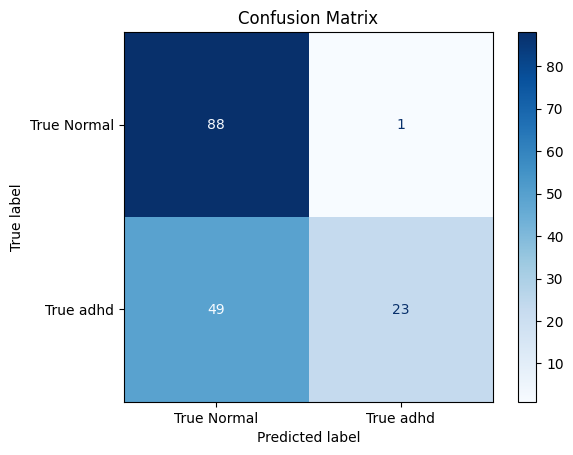

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.6974 - loss: 0.7480


In [14]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.preprocessing import StandardScaler
# Make predictions on test set
predictions = model.predict(test_features)
binary_predictions = np.round(predictions).flatten()

# Calculate confusion matrix
cm = confusion_matrix(test_labels, binary_predictions)

# Plot confusion matrix
labels = ['Normal', 'adhd']  
display_labels = ['True ' + label for label in labels]
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=display_labels)
disp.plot(cmap=plt.cm.Blues, values_format='d')
plt.title('Confusion Matrix')
plt.show()

accuracy=[]
# Calculate accuracy
accuracy.append(model.evaluate(test_features, test_labels)[1])

In [15]:
#calculating sensitivity and specificity
tn, fp, fn, tp = cm.ravel()

sensitivity = tp / (tp + fn)
specificity = tn / (tn + fp)
print(f"Sensitivity: {sensitivity}")
print(f"Specificity: {specificity}")

Sensitivity: 0.3194444444444444
Specificity: 0.9887640449438202


In [16]:
from sklearn.metrics import classification_report

# Calculate precision, recall, F1-score, and support
report = classification_report(test_labels, binary_predictions, target_names=['NORMAL', 'ADHD'])

print(report)

              precision    recall  f1-score   support

      NORMAL       0.64      0.99      0.78        89
        ADHD       0.96      0.32      0.48        72

    accuracy                           0.69       161
   macro avg       0.80      0.65      0.63       161
weighted avg       0.78      0.69      0.64       161



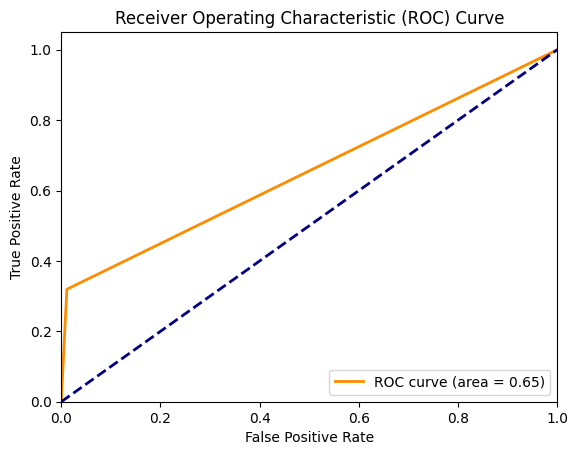

In [17]:
from sklearn.metrics import roc_curve, auc

# Compute ROC curve and ROC area for each class
fpr, tpr, _ = roc_curve(test_labels, binary_predictions)

# Calculate area under the curve (AUC)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()